In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 1. Make a dataframe 'df' out of covid_19_india.csv dataset

In [5]:
df=pd.read_csv("covid_19_india.csv")
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Unnamed: 9
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0,NaN
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0,NaN
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0,NaN
3,4.0,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,NaN
4,5.0,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...
4597,4598.0,28/07/20,8:00 AM,Tripura,-,-,2467.0,17.0,4049.0,NaN
4598,4599.0,28/07/20,8:00 AM,Uttarakhand,-,-,3675.0,66.0,6328.0,NaN
4599,4600.0,28/07/20,8:00 AM,Uttar Pradesh,-,-,42833.0,1456.0,70493.0,NaN
4600,4601.0,28/07/20,8:00 AM,West Bengal,-,-,39917.0,1411.0,60830.0,NaN


# 2. Drop the irrelevant columns.


In [6]:
df1=df.drop(columns=['Sno','Unnamed: 9'])
df1=df1.drop(index=4601,axis=0)
df1

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...
4596,28/07/20,8:00 AM,Telengana,-,-,42909.0,480.0,57142.0
4597,28/07/20,8:00 AM,Tripura,-,-,2467.0,17.0,4049.0
4598,28/07/20,8:00 AM,Uttarakhand,-,-,3675.0,66.0,6328.0
4599,28/07/20,8:00 AM,Uttar Pradesh,-,-,42833.0,1456.0,70493.0


# 3. Find the active patients and add a column 'Active' to the dataframe

In [7]:
df1['Active']=df1['Confirmed']-df1['Deaths']-df1['Cured']
df1

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0,1.0
1,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0,1.0
2,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0,2.0
3,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,3.0
4,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...
4596,28/07/20,8:00 AM,Telengana,-,-,42909.0,480.0,57142.0,13753.0
4597,28/07/20,8:00 AM,Tripura,-,-,2467.0,17.0,4049.0,1565.0
4598,28/07/20,8:00 AM,Uttarakhand,-,-,3675.0,66.0,6328.0,2587.0
4599,28/07/20,8:00 AM,Uttar Pradesh,-,-,42833.0,1456.0,70493.0,26204.0


# 4. Find the state having current maximum Active patient and noof active patients.


In [8]:
df2=df1.groupby("State/UnionTerritory").sum()
df2

,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,
Andaman and Nicobar Islands,5466.0,1.0,8006.0,2539.0
Andhra Pradesh,716878.0,18691.0,1466367.0,730798.0
Arunachal Pradesh,6181.0,69.0,18446.0,12196.0
Assam,429096.0,1446.0,661851.0,231309.0
Bihar,539437.0,6008.0,833259.0,287814.0
Cases being reassigned to states,0.0,0.0,345565.0,345565.0
Chandigarh,24068.0,499.0,34825.0,10258.0
Chhattisgarh,125536.0,849.0,184428.0,58043.0
Dadar Nagar Haveli,14.0,0.0,186.0,172.0


In [9]:
column=df2['Active']
max_active=column.max()
max_index=column.idxmax()
print("The state having maximum no.of active cases is",max_index,"and the no.of active cases is",max_active)

The state having maximum no.of active cases is Maharashtra and the no.of active cases is 5441638.0


# 5. Find the state having current minimum Active patient and noof active patients.


In [10]:
column=df2['Active']
min_active=column.min()
min_index=column.idxmin()
print("The state having maximum no.of active cases is",min_index,"and the no.of active cases is",min_active)

The state having maximum no.of active cases is Daman & Diu and the no.of active cases is 2.0


# 6. Find the current Deaths to Cured ratio then find the states having minimum and maximum ratios.


In [11]:
deaths= df2['Deaths'].to_numpy()
cured=df2['Cured'].to_numpy()
ratio=deaths/cured
df2['deaths_to_cured']=ratio
df2

c:\users\divya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


,Cured,Deaths,Confirmed,Active,deaths_to_cured
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,5466.0,1.0,8006.0,2539.0,0.000183
Andhra Pradesh,716878.0,18691.0,1466367.0,730798.0,0.026073
Arunachal Pradesh,6181.0,69.0,18446.0,12196.0,0.011163
Assam,429096.0,1446.0,661851.0,231309.0,0.003370
Bihar,539437.0,6008.0,833259.0,287814.0,0.011138
Cases being reassigned to states,0.0,0.0,345565.0,345565.0,NaN
Chandigarh,24068.0,499.0,34825.0,10258.0,0.020733
Chhattisgarh,125536.0,849.0,184428.0,58043.0,0.006763
Dadar Nagar Haveli,14.0,0.0,186.0,172.0,0.000000


In [12]:
column=df2['deaths_to_cured']
max_index=column.idxmax()
print("The state having maximum deaths to cured ratio is",max_index)

The state having maximum deaths to cured ratio is Gujarat


# 7. Take two states Delhi and Maharashtra. Plot 'Cured', 'Deaths' and 'Active' parameters over the Date and infer meaning from the curves.Give a comparison of both the plots.


In [13]:
d = df1["State/UnionTerritory"] == "Delhi"
delhi_df = df1[d]
delhi_df

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
34,02/03/20,6:00 PM,Delhi,1,0,0.0,0.0,1.0,1.0
38,03/03/20,6:00 PM,Delhi,1,0,0.0,0.0,1.0,1.0
42,04/03/20,6:00 PM,Delhi,1,0,0.0,0.0,1.0,1.0
45,05/03/20,6:00 PM,Delhi,2,0,0.0,0.0,2.0,2.0
51,06/03/20,6:00 PM,Delhi,3,0,0.0,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...
4434,24/07/20,8:00 AM,Delhi,-,-,109065.0,3745.0,127364.0,14554.0
4469,25/07/20,8:00 AM,Delhi,-,-,110931.0,3777.0,128389.0,13681.0
4504,26/07/20,8:00 AM,Delhi,-,-,113068.0,3806.0,129531.0,12657.0
4539,27/07/20,8:00 AM,Delhi,-,-,114875.0,3827.0,130606.0,11904.0


In [14]:
d1 = df1["State/UnionTerritory"] == "Maharashtra"
Maharashtra_df = df1[d1]
Maharashtra_df

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
76,09/03/20,6:00 PM,Maharashtra,2,0,0.0,0.0,2.0,2.0
91,10/03/20,6:00 PM,Maharashtra,5,0,0.0,0.0,5.0,5.0
97,11/03/20,6:00 PM,Maharashtra,2,0,0.0,0.0,2.0,2.0
120,12/03/20,6:00 PM,Maharashtra,11,0,0.0,0.0,11.0,11.0
133,13/03/20,6:00 PM,Maharashtra,14,0,0.0,0.0,14.0,14.0
...,...,...,...,...,...,...,...,...,...
4445,24/07/20,8:00 AM,Maharashtra,-,-,194253.0,12854.0,347502.0,140395.0
4480,25/07/20,8:00 AM,Maharashtra,-,-,199967.0,13132.0,357117.0,144018.0
4515,26/07/20,8:00 AM,Maharashtra,-,-,207194.0,13389.0,366368.0,145785.0
4550,27/07/20,8:00 AM,Maharashtra,-,-,213238.0,13656.0,375799.0,148905.0


In [15]:
delhi_df['Date'] = pd.to_datetime(delhi_df['Date'])
delhi_df1 = delhi_df.set_index("Date")
Maharashtra_df['Date'] = pd.to_datetime(Maharashtra_df['Date'])
Maharashtra_df1 = Maharashtra_df.set_index("Date")

c:\users\divya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\divya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Death Cases')

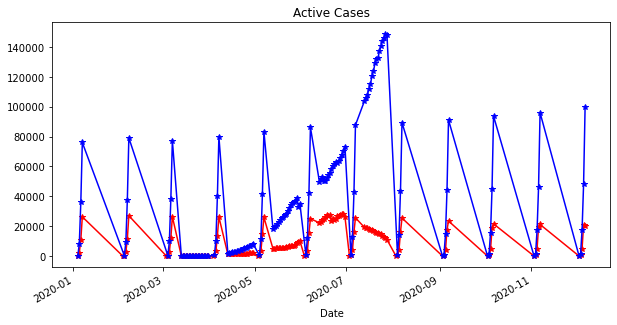

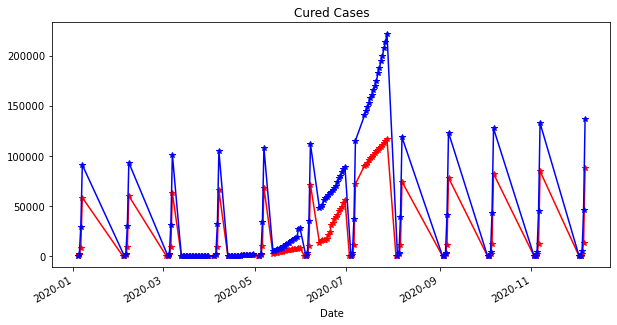

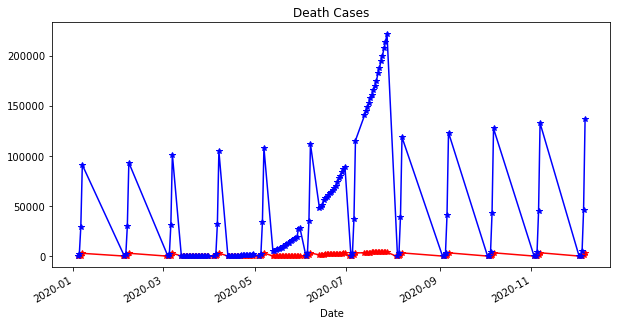

In [16]:
plot1 = plt.figure(1,figsize = (10,5))
delhi_df1.Active.plot(marker='*', color = "red")
Maharashtra_df1.Active.plot(marker='*', color = "blue")
plt.title("Active Cases")
plot2 = plt.figure(2, figsize = (10,5))
delhi_df1.Cured.plot(marker='*', color = "red")
Maharashtra_df1.Cured.plot(marker='*', color = "blue")
plt.title("Cured Cases")
plot3 = plt.figure(3, figsize = (10,5))
delhi_df1.Deaths.plot(marker='*',color = "red")
Maharashtra_df1.Cured.plot(marker='*', color = "blue")
plt.title("Death Cases")

# Inference:
Form above graphsit is clearly visible that  the number of Active, Deaths as well as cured cases in Maharashtra quite more than that of Delhi throughout the pandemic situation.

# 8. Plot pie charts on the last recorded data of both Delhi and Maharashtra having labels as 'Active', 'Deaths', 'Cured' with clear mention of percentage. Infer the meaning out of plots.

([<matplotlib.patches.Wedge at 0x2387e93d6a0>,
 [Text(-0.602051458063617, 0.9206161207818778, 'Cured'),
  Text(0.5129045341485249, -0.9731027380754228, 'Active'),
  Text(1.095135464636963, -0.10333592838109779, 'Deaths')],
 [Text(-0.32839170439833654, 0.502154247699206, '68.4%'),
  Text(0.279766109535559, -0.5307833116775033, '28.6%'),
  Text(0.597346617074707, -0.056365051844235146, '3.0%')])

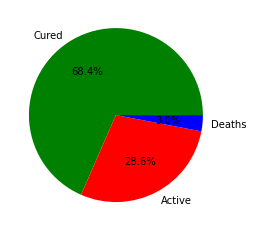

In [17]:
colors = ["green","red","blue"]
labels = ["Cured", "Active", "Deaths"]
a = delhi_df["Cured"].mean()
b = delhi_df["Active"].mean()
c = delhi_df["Deaths"].mean()
x = [a,b,c]
plt.pie(x, labels=labels,colors=colors,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x2387ea2e908>,
 [Text(-0.02870957547778237, 1.0996252817555106, 'Cured'),
  Text(-0.10941855986166377, -1.0945444617546607, 'Active'),
  Text(1.0913158052406702, -0.13794858908994936, 'Deaths')],
 [Text(-0.015659768442426746, 0.5997956082302783, '50.8%'),
  Text(-0.05968285083363477, -0.5970242518661785, '45.2%'),
  Text(0.595263166494911, -0.07524468495815419, '4.0%')])

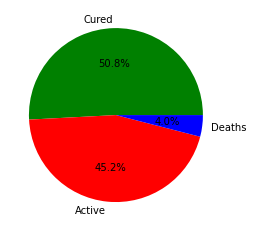

In [18]:
colors = ["green","red","blue"]
labels = ["Cured", "Active", "Deaths"]
a = Maharashtra_df["Cured"].mean()
b = Maharashtra_df["Active"].mean()
c = Maharashtra_df["Deaths"].mean()
x = [a,b,c]
plt.pie(x, labels=labels,colors=colors,autopct='%1.1f%%')

# Inference:
From the above graphs it can be inferred that the cured percentage of Delhi is more than that of  Maharashtra while the active and death percentage of Maharashtra is more than that of delhi.